In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import random 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#dataset
dataset = 20000

np.random.seed(50)

#產生dataset列 X2行的0~1隨機數字
D=np.random.random(size=(dataset,2))
#velocity 假設初速
V=D[:,0]*100
#theta 假設角度
theta=D[:,1]*90


print(V)

#初速平方
v2=pow(V,2)

#sin theta 平方
sin2=pow(np.sin(np.deg2rad(theta)),2)

#sin theta乘 cos theta
sincos=np.multiply(np.sin(np.deg2rad(theta)),np.cos(np.deg2rad(theta)))


#拋物線公式計算Max H & R
H=np.multiply(v2,sin2)/2/9.8
R=2*np.multiply(v2,sincos)/9.8

#將數據重新reshaape
V=np.reshape(V,(dataset,-1))
theta=np.reshape(theta,(dataset,-1))
R=np.reshape(R,(dataset,-1))
H=np.reshape(H,(dataset,-1))


#將數據append一起
dataset1=np.append(V,theta, axis=1)
dataset1=np.append(dataset1,R, axis=1)
dataset1=np.append(dataset1,H, axis=1)
print("    Velocity   ,  theta   ,     Max R ,      Max H")
print(dataset1)


[49.46016455 25.54739238 37.73150977 ... 75.21504778  9.8756471
  6.72672103]
    Velocity   ,  theta   ,     Max R ,      Max H
[[ 49.46016455  20.5274794  163.94822238  15.34684174]
 [ 25.54739238  35.66969188  63.09782844  11.32244925]
 [ 37.73150977  89.69168071   1.56344267  72.63395941]
 ...
 [ 75.21504778  69.28241134 382.0251604  252.51560083]
 [  9.8756471   56.9310424    9.10121005   3.49444401]
 [  6.72672103  50.27175268   4.53926601   1.36552272]]


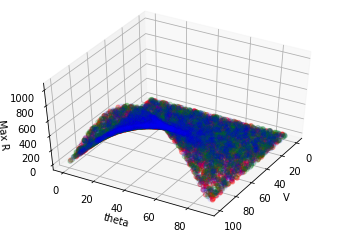

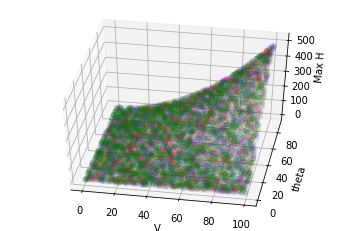

In [3]:
fig1 = plt.figure()
ax = plt.axes(projection='3d')

# 將random數據分成三種顏色繪製
ax.scatter(V[:3000], theta[:3000], R[:3000], c='r',alpha=0.3)  # 繪製數據點
ax.scatter(V[3000:6000], theta[3000:6000], R[3000:6000], c='g',alpha=0.2)
ax.scatter(V[6000:10000], theta[6000:10000], R[6000:10000], c='b',alpha=0.05)
ax.set_zlabel('Max R')  #坐標軸
ax.set_ylabel('theta')
ax.set_xlabel('V')
ax.view_init(45, 30)
plt.savefig('MaxRdata.png',dpi=150)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(V[:3000], theta[:3000], H[:3000], c='r',alpha=0.05)  # 繪製數據點
ax.scatter(V[3000:6000], theta[3000:6000], H[3000:6000], c='g',alpha=0.1)
ax.scatter(V[6000:10000], theta[6000:10000], H[6000:10000], c='b',alpha=0.05)
ax.set_zlabel('Max H')  #坐標軸
ax.set_ylabel('theta')
ax.set_xlabel('V')
ax.view_init(45, -80)
plt.savefig('MaxHdata.png',dpi=150)


In [4]:
#X為已知初速及仰角 Y為結果之Max R&H
X=dataset1[:,:2]
Y=dataset1[:,2:4]

traindata=0.9*dataset # 取資料點當中前 90% 筆資料當作 training data
testdata=0.1*dataset # 取資料點當中，後 10% 筆資料當作 testing data

# 建立 trainig 與 testing data
X_train, Y_train = X[:int(traindata)], Y[:int(traindata)]
X_test, Y_test = X[int(traindata):], Y[int(traindata):]

In [5]:
#建模
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_dim=2,kernel_initializer='normal', activation=tf.nn.relu,name='Input_Layer'),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,name='BN_Layer1'),
    tf.keras.layers.Dense(64, activation=tf.nn.relu,name='hidden_Layer2'),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False,name='BN_Layer2'),
    tf.keras.layers.Dense(64, activation=tf.nn.relu,name='hidden_Layer3'),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,name='BN_Layer3'),
    tf.keras.layers.Dense(32, activation=tf.nn.relu,name='hidden_Layer4'),
    tf.keras.layers.Dense(2,name='output_Layer')])

#from tensorflow.keras.callbacks import TensorBoard

#kerasboard = TensorBoard(log_dir='./logs',
#                         histogram_freq=1,
 #                        batch_size=32,
  #                       write_graph=True,
   #                      write_grads=False,
    #                     write_images=False,
     #                    embeddings_freq=1,
      #                   embeddings_layer_names=['Input_Layer','hidden_Layer2','hidden_Layer3','hidden_Layer4','output_Layer'],
       #                  embeddings_metadata=None,
        #                 embeddings_data=None,
         #                update_freq='epoch')

#https://www.cnblogs.com/smuxiaolei/p/8662177.html有loss說明
#均方对数误差,缩写MSLE

model.compile(optimizer='adam',loss='msle',metrics=['accuracy'])             


    
print( "Training ------------")
# Another way to train the model
#model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_split=0.3,callbacks=[kerasboard])
model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_split=0.3)

print( "\nTesting ------------")
# Evaluate the model with the metrics we defined earlier
score = model.evaluate(X_test, Y_test, verbose=0)

## loss, accuracy = model.evaluate(X_test, Y_test)

print( "test loss: {}".format(score[0])) #loss
print( "test accuracy: {}".format(score[1])) #accuracy


Instructions for updating:
Colocations handled automatically by placer.
Training ------------
Train on 12600 samples, validate on 5400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
12600/12600 [==============================] - 2s 166us/sample - loss: 4.1034 - acc: 0.5749 - val_loss: 1.2460 - val_acc: 0.5283
Epoch 2/40
12600/12600 [==============================] - 1s 62us/sample - loss: 0.8657 - acc: 0.7234 - val_loss: 0.5676 - val_acc: 0.9154
Epoch 3/40
12600/12600 [==============================] - 1s 63us/sample - loss: 0.4710 - acc: 0.8887 - val_loss: 0.2747 - val_acc: 0.9030
Epoch 4/40
12600/12600 [==============================] - 1s 62us/sample - loss: 0.3051 - acc: 0.9032 - val_loss: 0.1524 - val_acc: 0.9356
Epoch 5/40
12600/12600 [==============================] - 1s 62us/sample - loss: 0.2402 - acc: 0.9252 - val_loss: 0.1135 - val_acc: 0.9554
Epoch 6/40
12600/12600 [==============================] - 1s 64us/sample - loss: 0.1995 - acc: 0.9387 - val_loss:

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 32)                96        
_________________________________________________________________
BN_Layer1 (BatchNormalizatio (None, 32)                128       
_________________________________________________________________
hidden_Layer2 (Dense)        (None, 64)                2112      
_________________________________________________________________
BN_Layer2 (BatchNormalizatio (None, 64)                192       
_________________________________________________________________
hidden_Layer3 (Dense)        (None, 64)                4160      
_________________________________________________________________
BN_Layer3 (BatchNormalizatio (None, 64)                256       
_________________________________________________________________
hidden_Layer4 (Dense)        (None, 32)                2080      
__________